## CCN Lab 3 -- Drift Diffusion Process

#### Task 1 -- Initial Simulations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def drift_diffusion_model(v, a, s, z, dt, timeout=2000):
    step = 0
    W = z

    times = [0]
    vals = [W]

    while step < timeout and W > 0 and W < a:
        eta = np.random.normal(0, np.sqrt(dt))
        W += v * dt + s * eta
        W = np.clip(W, 0, a) # We truncate values outside [0, a] for plotting purposes

        step += 1
        times.append(step * dt)
        vals.append(W)

    if step == timeout:
        return times, vals, -1
    elif W == 0:
        return times, vals, 0
    elif W == a:
        return times, vals, 1
    else:
        raise ValueError("W is not 0 or a. This should not happen.")

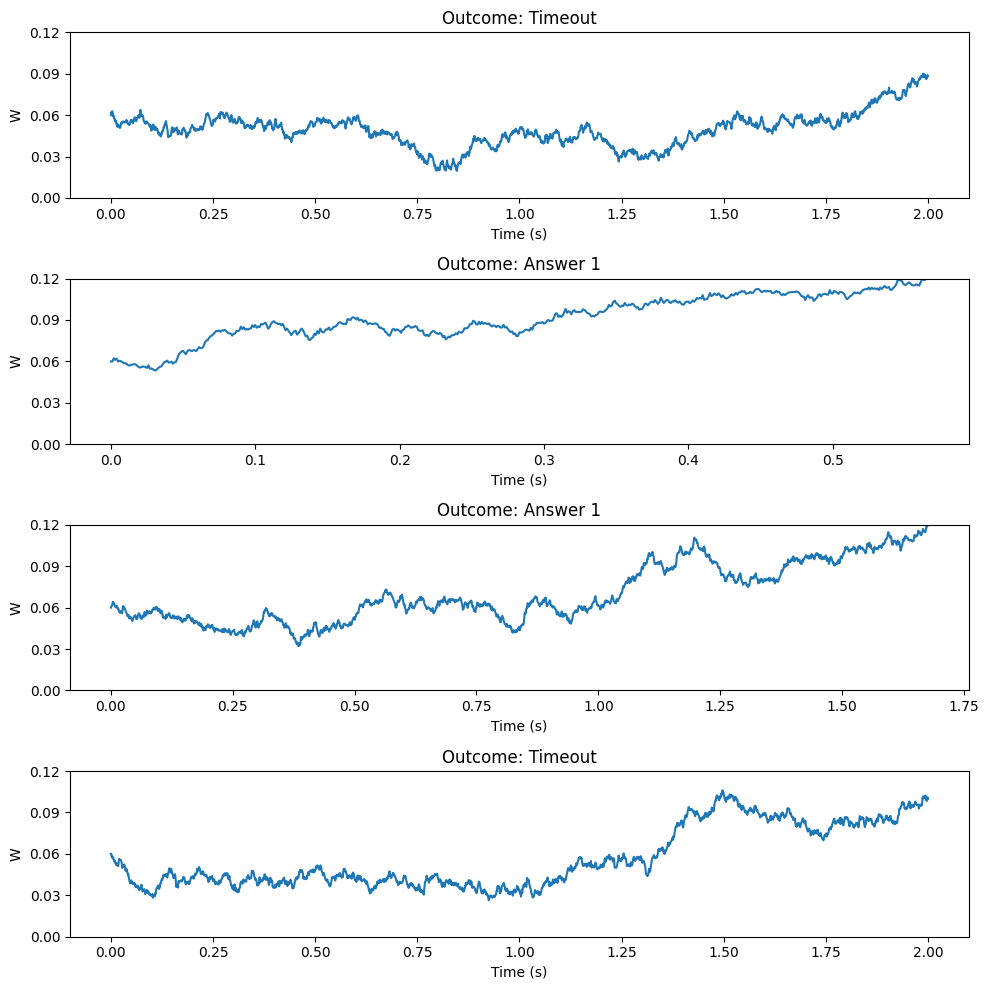

In [2]:
v, a, s, z, dt = 0.03, 0.12, 0.04, 0.06, 0.001

# Plot 4 example paths
fig, axes = plt.subplots(4, 1, figsize=(10, 10))
for i in range(4):
    times, vals, outcome = drift_diffusion_model(v, a, s, z, dt)
    axes[i].plot(times, vals)
    outcome_str = "Answer 1" if outcome == 1 else "Answer 0" if outcome == 0 else "Timeout"
    axes[i].set_title("Outcome: {}".format(outcome_str))
    axes[i].set_xlabel("Time (s)")
    axes[i].set_ylabel("W")
    axes[i].set_ylim(0, a)
    axes[i].set_yticks(np.linspace(0, a, 5))
plt.tight_layout()
plt.show()

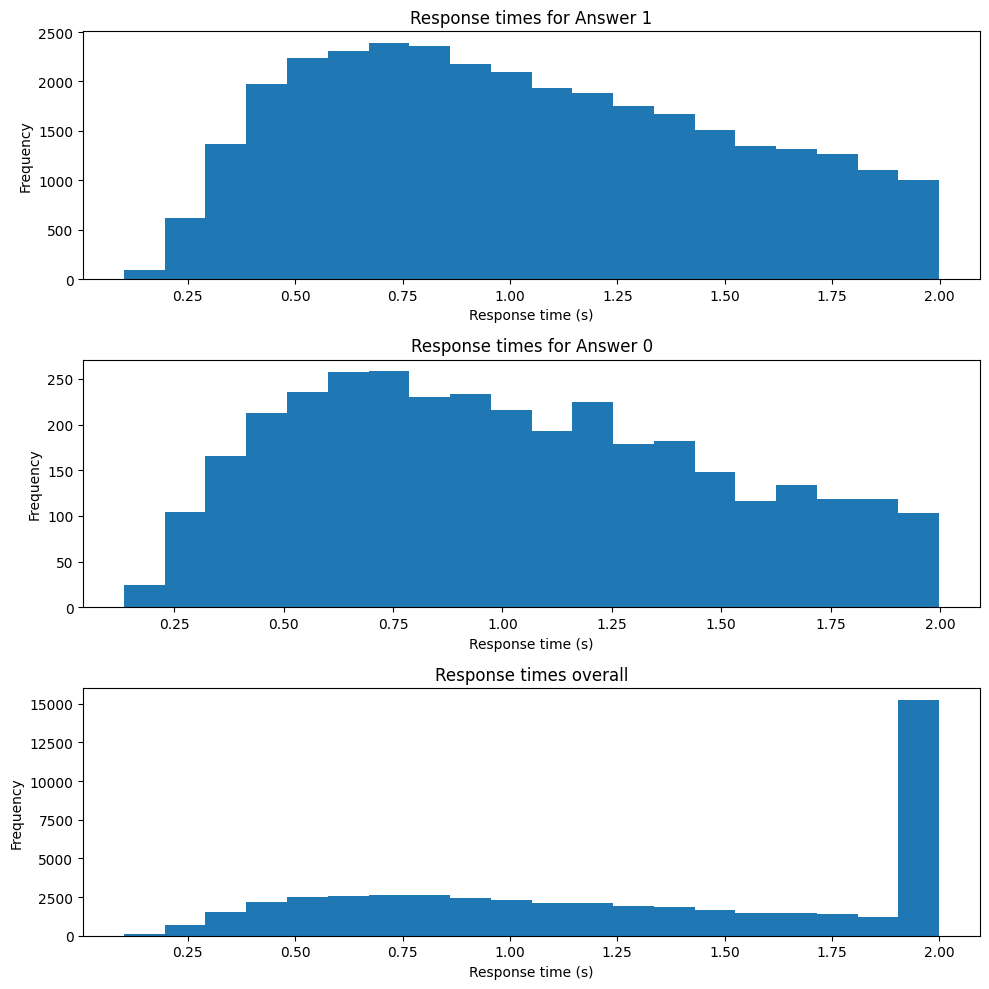

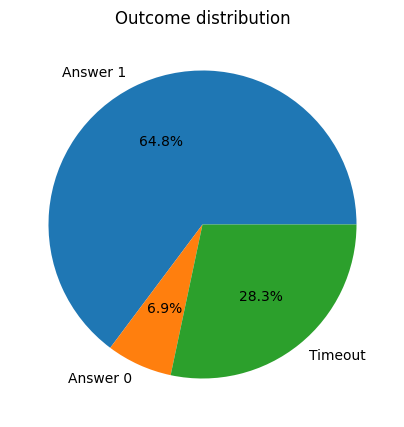

Accuracy: 0.65
Mean response time for Answer 1: 1.03s
Mean response time for Answer 0: 1.02s


In [ ]:
outcomes = []
response_times = []
for _ in range(50000):
    times, _, outcome = drift_diffusion_model(v, a, s, z, dt)
    outcomes.append(outcome)
    response_times.append((len(times) - 1) * dt)

def show_results(outcomes, response_times, plot=True):
    response_times_1 = [response_times[i] for i in range(len(outcomes)) if outcomes[i] == 1]
    response_times_0 = [response_times[i] for i in range(len(outcomes)) if outcomes[i] == 0]

    # Plot three histograms of response times, for outcome 1, 0 and overall
    if plot:
        fig, axes = plt.subplots(3, 1, figsize=(10, 10))
        axes[0].hist(response_times_1, bins=20)
        axes[0].set_title("Response times for Answer 1")
        axes[0].set_xlabel("Response time (s)")
        axes[0].set_ylabel("Frequency")
        axes[1].hist(response_times_0, bins=20)
        axes[1].set_title("Response times for Answer 0")
        axes[1].set_xlabel("Response time (s)")
        axes[1].set_ylabel("Frequency")
        axes[2].hist(response_times, bins=20)
        axes[2].set_title("Response times overall")
        axes[2].set_xlabel("Response time (s)")
        axes[2].set_ylabel("Frequency")
        plt.tight_layout()
        plt.show()

        # Plot the distribution of outcomes as a pie chart
        plt.figure(figsize=(5, 5))
        plt.pie([outcomes.count(1), outcomes.count(0), outcomes.count(-1)], labels=["Answer 1", "Answer 0", "Timeout"], autopct='%1.1f%%')
        plt.title("Outcome distribution")
        plt.show()

    # Return accuracy and mean response times for correct and incorrect answers
    accuracy = outcomes.count(1) / len(outcomes)
    mean_response_time_1 = np.mean(response_times_1)
    mean_response_time_0 = np.mean(response_times_0)
    return accuracy, mean_response_time_1, mean_response_time_0

accuracy, mean_response_time_1, mean_response_time_0 = show_results(outcomes, response_times)
print("Accuracy: {:.2f}".format(accuracy))
print("Mean response time for Answer 1: {:.2f}s".format(mean_response_time_1))

print("Mean response time for Answer 0: {:.2f}s".format(mean_response_time_0))

Since, above, the mean drift rate $v$ is positive, Answer 1 ($h_+$) is the correct response. It occurs in about two thirds of all simulations ($\sim 65\%$). A timeout is the second most common outcome ($\sim 28\%$), followed by a false response in distant third place ($\sim 7\%$). This distribution of outcomes may indicate that subjects' performance may benefit from not hesitating too long, but rather answering confidently based on first impressions. Errors due to indecisiveness appear much more common than errors due to incorrect sampling / integration of the evidence.

In terms of the model, performance in the experiment would likely improve if the decision boundary $a$ was lowered, adjusting $W(0) = z = a/2$ accordingly. The same would occur if the timeout boundary was increased.

This reasoning may not apply if the response time distributions for correct and incorrect responses had very different shapes; e.g., if answers given quickly had a higher chance of being incorrect than answers given close to the timeout -- this is not the case, however.

#### Task 2 -- Exploring parameter settings

v = 0.01, a = 0.02, Accuracy: 0.55, Mean response time for Answer 1: 0.07s, Mean response time for Answer 0: 0.07s
v = 0.01, a = 0.04, Accuracy: 0.57, Mean response time for Answer 1: 0.21s, Mean response time for Answer 0: 0.21s
v = 0.01, a = 0.05, Accuracy: 0.57, Mean response time for Answer 1: 0.40s, Mean response time for Answer 0: 0.43s
v = 0.01, a = 0.07, Accuracy: 0.60, Mean response time for Answer 1: 0.63s, Mean response time for Answer 0: 0.63s
v = 0.01, a = 0.08, Accuracy: 0.55, Mean response time for Answer 1: 0.83s, Mean response time for Answer 0: 0.84s
v = 0.01, a = 0.10, Accuracy: 0.48, Mean response time for Answer 1: 0.95s, Mean response time for Answer 0: 0.94s
v = 0.01, a = 0.11, Accuracy: 0.41, Mean response time for Answer 1: 1.03s, Mean response time for Answer 0: 1.05s
v = 0.01, a = 0.13, Accuracy: 0.40, Mean response time for Answer 1: 1.12s, Mean response time for Answer 0: 1.17s
v = 0.01, a = 0.14, Accuracy: 0.33, Mean response time for Answer 1: 1.22s, Mean

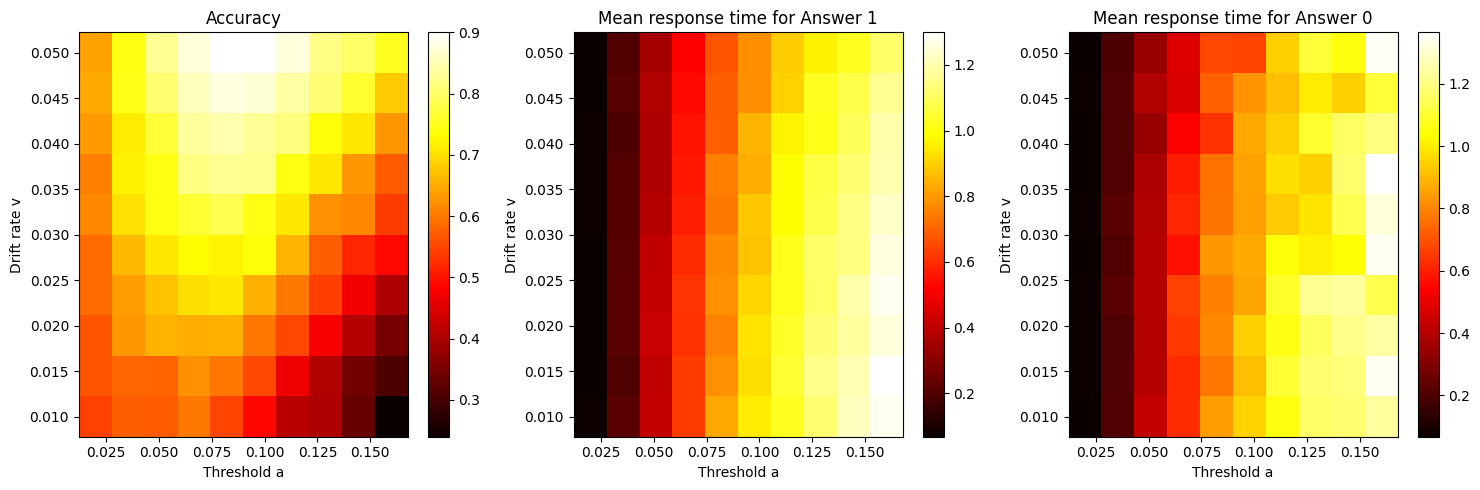

In [6]:
# Keep s = 0.04, dt = 0.001 fixed. Always set z = a / 2.
# Vary settings for v and a, and plot heatmaps of accuracy, mean response time for Answer 1 and mean response time for Answer 0.

vs = np.linspace(0.01, 0.05, 10)
as_ = np.linspace(0.02, 0.16, 10)
num_simulations = 1000

accuracies = np.zeros((len(vs), len(as_)))
mean_response_times_1 = np.zeros((len(vs), len(as_)))
mean_response_times_0 = np.zeros((len(vs), len(as_)))

for i, v in enumerate(vs):
    for j, a in enumerate(as_):
        outcomes = []
        response_times = []
        for _ in range(num_simulations):
            times, _, outcome = drift_diffusion_model(v, a, s, a / 2, dt)
            outcomes.append(outcome)
            response_times.append((len(times) - 1) * dt)
        accuracy, mean_response_time_1, mean_response_time_0 = show_results(outcomes, response_times, plot=False)
        print("v = {:.2f}, a = {:.2f}, Accuracy: {:.2f}, Mean response time for Answer 1: {:.2f}s, Mean response time for Answer 0: {:.2f}s".format(v, a, accuracy, mean_response_time_1, mean_response_time_0))
        accuracies[i, j] = accuracy
        mean_response_times_1[i, j] = mean_response_time_1
        mean_response_times_0[i, j] = mean_response_time_0

X, Y = np.meshgrid(as_, vs)

plt.figure(figsize=(15, 5))

# Accuracy heatmap
plt.subplot(1, 3, 1)
plt.pcolormesh(X, Y, accuracies, cmap='hot', shading='auto')
plt.colorbar()
plt.xlabel("Threshold a")
plt.ylabel("Drift rate v")
plt.title("Accuracy")

# Mean response time for Answer 1 heatmap
plt.subplot(1, 3, 2)
plt.pcolormesh(X, Y, mean_response_times_1, cmap='hot', shading='auto')
plt.colorbar()
plt.xlabel("Threshold a")
plt.ylabel("Drift rate v")
plt.title("Mean response time for Answer 1")

# Mean response time for Answer 0 heatmap
plt.subplot(1, 3, 3)
plt.pcolormesh(X, Y, mean_response_times_0, cmap='hot', shading='auto')
plt.colorbar()
plt.xlabel("Threshold a")
plt.ylabel("Drift rate v")
plt.title("Mean response time for Answer 0")

plt.tight_layout()
plt.show()

Consistently, higher values of $v$ increase the accuracy and lower the mean response time for correct answers. This is intuitively clear, as raising $v$ lowers the impact of noise and makes it more likely that evidence is sampled without being misled. It is equally clear that lowering decision threshold $a$ consistently lowers the mean response times for both answers -- as both decision boundaries move further away from the starting value. The relationship between $a$ and the mean accuracy is somewhat more involved. If $a$ is too large or too small for a given $v$, errors increase due to, respectively, more timeouts or more rash, wrong decisions after sampling noisy, misleading evidence. The "sweet spot" -- how high $a$ should be to maximize the performance -- further depends on $v$ and the timeout constraint, in a way that's not immediately obvious. Conceptually, the trade-off at play is that the model wants to make its decision as late as possible -- reducing the coefficient of variation of the total evidence -- without running the risk of a timeout.

#### Task 3 -- Prior information

Prior information can be said to correspond to evidence sampled before the start of the diffusion process or, more concretely, to a shift in the starting condition $W(0) = z$. If hypothesis $h_+$ is deemed more likely a priori, then $W(0)$ should be larger than $a/2$.

Q: *How far* above the default should $W(0)$ lie for a given prior probability?

A: It is not entirely possible to say, as values of $W$ cannot be uniquely mapped to posterior probabilities without further modelling assumptions -- e.g., what posterior probability would the value $W = a$ correspond to? The true answer is not "1".

Coming up with a full "Bayesian treatment" of our DDM thus lies outside the scope of this Lab, but we can propose an answer by making some simplifying assumptions. For a given decision threshold, noise level and initial condition, we might equate the prior probability of $h_+$ with the likelihood of $W$ reaching $a$ before reaching $0$, if future evidence, on average, did not favour either hypothesis. (Note: Then, $W=a$ *would* correspond to a posterior of $1$, which is why this approach is not **entirely** principled.)

z = 0.01, Accuracy: 0.10
z = 0.02, Accuracy: 0.18
z = 0.03, Accuracy: 0.27
z = 0.04, Accuracy: 0.34
z = 0.05, Accuracy: 0.41
z = 0.06, Accuracy: 0.50
z = 0.07, Accuracy: 0.57
z = 0.08, Accuracy: 0.67
z = 0.09, Accuracy: 0.75
z = 0.10, Accuracy: 0.83
z = 0.11, Accuracy: 0.89


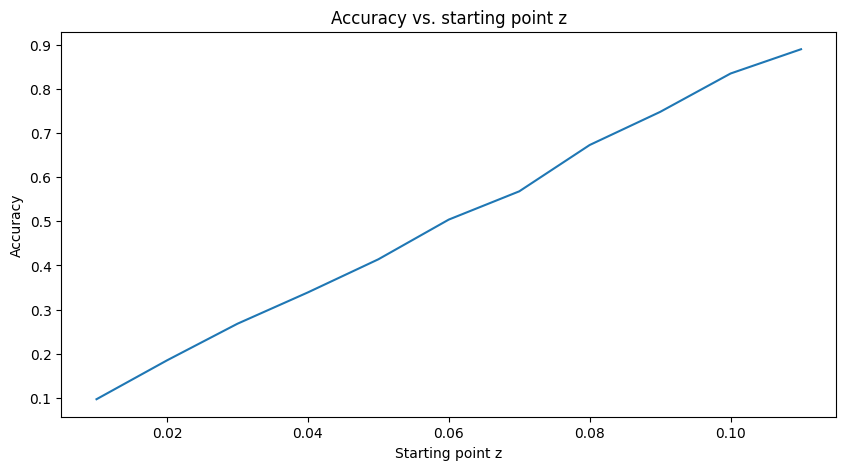

In [49]:
accuracies = []
a = 0.12
s = 0.03
zs = np.linspace(0.01, 0.11, 11)

for z in zs:
    outcomes = []
    response_times = []
    for _ in range(1000):
        times, _, outcome = drift_diffusion_model(0.0, a, s, z, dt, timeout=1000000) # Set v = 0 to simulate a random walk. We set a high timeout to ensure the simulation always ends with one of the outcomes.
        outcomes.append(outcome)
        response_times.append((len(times) - 1) * dt)
    accuracy, _, _ = show_results(outcomes, response_times, plot=False)
    print("z = {:.2f}, Accuracy: {:.2f}".format(z, accuracy))
    accuracies.append(accuracy)

plt.figure(figsize=(10, 5))
plt.plot(zs, accuracies)
plt.xlabel("Starting point z")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. starting point z")
plt.show()


The prior $h_+ = 2 \times h_-$ corresponds to an "accuracy" of $0.67$ in our above setup, suggesting that, for decision threshold $a = 0.12$, the prior may be appropriately represented by the initial condition $W(0) = 0.08$. 

You would be absolutely correct in pointing out that, effectively, all we are doing is setting $W(0) = a * p$ where $p = P(X=1)$.

#### Task 4 -- Group differences

a)

It is entirely possible that the parameters of a diffusion model will be more sensitive to group differences than statistical tests considering reaction times OR accuracy individually. Patterns in the reaction times and response accuracies of subjects may suggest significant differences in, e.g., drift rate between experimental groups, even if these groups do not (strongly) differ in their mean outcome measures. As discussed in class, this argument was made by [White et al. (2010)](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=97735d2bb86abbc26e54916d044fd8614608951c).


b)   

Difficulties in evidence accumulation might be paraphrased as a failure to holistically consider the total body of sampled evidence that should influence one's decision-making. One may hypothesize that this occurs by discarding previous evidence as new percepts are processed. Following this idea, one could integrate a decay rate $\gamma$ into the DDM model. Independently of the content of new sampled evidence, the accumulated evidence should drift towards its initial value $z$ over time. This can be achieved via the formulation $$W(t+dt) = W(t) + \gamma \times (z - W(t)) + v \times dt + s \times \eta$$ or, equivalently ,$$W(t+dt) = \gamma z + (1 - \gamma)W(t) + v dt + s \eta$$.

To consider a slow-down of 'non-decision processes' (perception and/or motor execution), it is helpful to realize that a subject's 'reaction time' $T$ to a stimulus, is the sum of the time it takes one's sensory cortices to process the stimulus ($T_e$), the time it takes to make a decision as to what action to take in response ($T_d$) and the time it takes to execute that response ($T_r$). Without further insight and neural recordings, separating $T_e$ and $T_r$ is tough. Therefore, these variables are usually lumped together as 'non-decision time' $T_{er}$. If a DDM is taken to be a model of the cognitive processes yielding decision time $T_d$, then parameter $T_{er}$ can be fitted simultaneously with the remainder of the model, when matching experimentally observed reaction times and accuracies (see [Myers et al.  (2022)](https://pmc.ncbi.nlm.nih.gov/articles/PMC9784241/)).